<a href="https://colab.research.google.com/github/YogeshRajgure/iNeuron_Assignments/blob/main/A21_ML_Combined_YR/A21_ML_CombinedA5_YR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5

In this assignment students have to make ARIMA model over shampoo sales
data and check the MSE between predicted and actual value.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/sales_data_for_3_yrs.csv',
                     header=0,
                     parse_dates=True,
                     index_col='Month')

In [3]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [4]:
series.head()


,Sales of shampoo over a three year period
Month,
01-Jan,266.0
01-Feb,145.9
01-Mar,183.1
01-Apr,119.3
01-May,180.3


In [5]:
series = series.dropna()

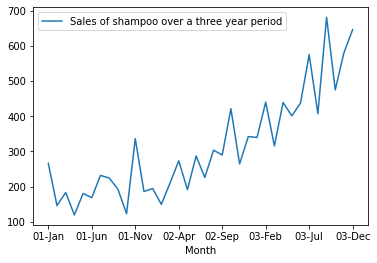

In [6]:
series.plot()
plt.show()

From here we can see that Shampoo sales data has a clear trend, that means time series is not stationary and will require differencing to make it stationary.

In [8]:
X = series.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [9]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [11]:
# performing train test split

In [10]:
train, test = X[0:size], X[size:len(X)]

In [14]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    arima = ARIMA(history,order=(5,1,0))
    arima_model = arima.fit(disp=0)
    output = arima_model.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat},Expected ={obs}')

error = mean_squared_error(test,predictions)

print(f"TEST MSE :{error}")

Predicted=[272.96448852],Expected =[421.6]
Predicted=[290.31373201],Expected =[264.5]
Predicted=[349.11777313],Expected =[342.3]
Predicted=[306.51298855],Expected =[339.7]
Predicted=[387.37641812],Expected =[440.4]
Predicted=[348.15413193],Expected =[315.9]
Predicted=[386.30878001],Expected =[439.3]
Predicted=[356.08203151],Expected =[401.3]
Predicted=[446.37950029],Expected =[437.4]
Predicted=[394.7372418],Expected =[575.5]
Predicted=[434.91552364],Expected =[407.6]
Predicted=[507.92341154],Expected =[682.]
Predicted=[435.48287297],Expected =[475.3]
Predicted=[652.74376206],Expected =[581.3]
Predicted=[546.34351034],Expected =[646.9]
TEST MSE :7547.807475966112


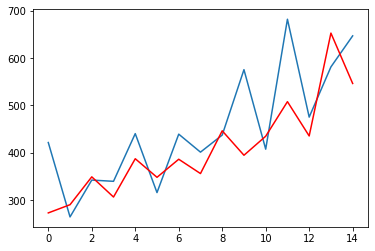

In [15]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [16]:
print(f"TEST MSE :{error}")

TEST MSE :7547.807475966112
